In [ ]:
import pandas as pd

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Habilakbar/tubes-machine-learning/main/Mall_Customers.csv'
data = pd.read_csv(url)
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# **Pembersihan Pra-pemrosesan Data**

In [ ]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
data.duplicated().sum()

np.int64(0)

# **Eksplorasi Data**

In [ ]:
print (data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


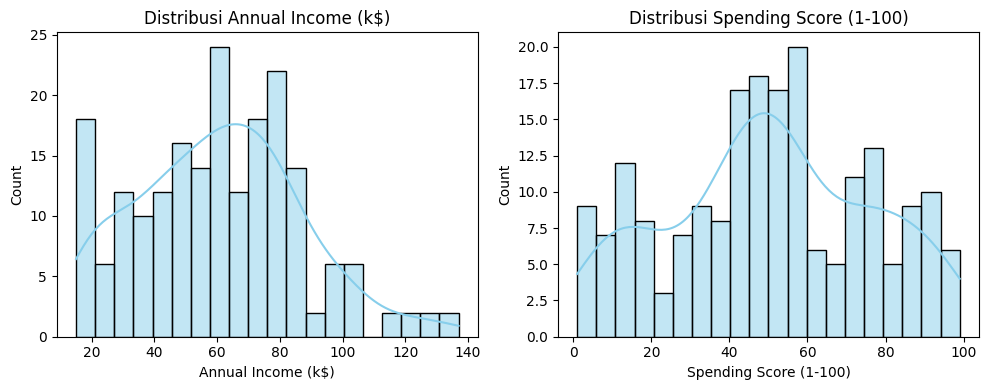

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
num_cols = ['Annual Income (k$)', 'Spending Score (1-100)']

plt.figure(figsize=(15, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(data[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

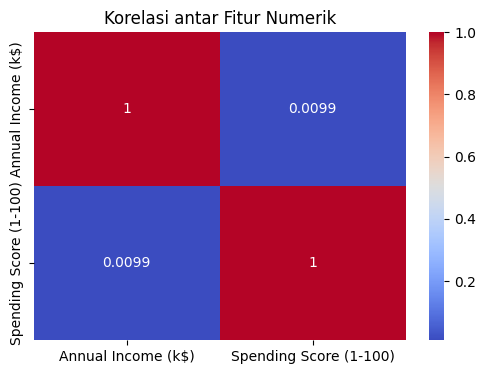

In [ ]:
# Heatmap korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar Fitur Numerik")
plt.show()

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **1. Kmeans dengan Evaluasi Silhouette**

Iterasi 1:
  Centroid 1: [60 52] -> [69.91946309 52.61744966]
  Centroid 2: [20 79] -> [25.72727273 79.36363636]
  Centroid 3: [30  4] -> [38.89655172 15.65517241]
Iterasi 2:
  Centroid 1: [69.91946309 52.61744966] -> [71.76086957 53.52173913]
  Centroid 2: [25.72727273 79.36363636] -> [28.07692308 76.23076923]
  Centroid 3: [38.89655172 15.65517241] -> [41.08333333 18.66666667]
Iterasi 3:
  Centroid 1: [71.76086957 53.52173913] -> [72.96923077 54.36153846]
  Centroid 2: [28.07692308 76.23076923] -> [29.10714286 74.57142857]
  Centroid 3: [41.08333333 18.66666667] -> [43.11904762 21.07142857]
Iterasi 4:
  Centroid 1: [72.96923077 54.36153846] -> [74.54545455 54.80991736]
  Centroid 2: [29.10714286 74.57142857] -> [32.17647059 71.35294118]
  Centroid 3: [43.11904762 21.07142857] -> [44.4        21.82222222]
Iterasi 5:
  Centroid 1: [74.54545455 54.80991736] -> [76.51818182 55.88181818]
  Centroid 2: [32.17647059 71.35294118] -> [34.55  68.525]
  Centroid 3: [44.4        21.82222222] -> 

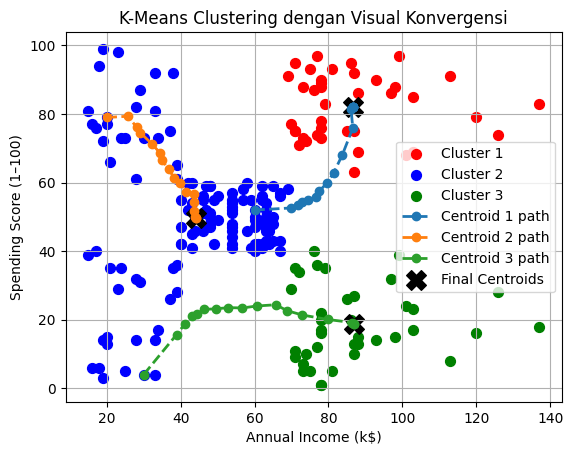

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Load Data ---
data = data
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# --- Parameter ---
k = 3
max_iters = 100
tol = 1e-4
np.random.seed(42)

# --- Inisialisasi Centroid ---
random_indices = np.random.choice(len(X), size=k, replace=False)
centroids = X[random_indices]
centroid_history = [centroids.copy()]  # Simpan posisi awal

# --- Fungsi Jarak ---
def compute_distance(a, b):
    return np.linalg.norm(a - b)

# --- K-Means Iteratif ---
for iteration in range(max_iters):
    clusters = [[] for _ in range(k)]

    for point in X:
        distances = [compute_distance(point, centroid) for centroid in centroids]
        cluster_idx = np.argmin(distances)
        clusters[cluster_idx].append(point)

    new_centroids = np.array([
        np.mean(cluster, axis=0) if cluster else centroids[i]
        for i, cluster in enumerate(clusters)
    ])

    centroid_history.append(new_centroids.copy())  # Simpan history

    # Print posisi centroid
    print(f"Iterasi {iteration+1}:")
    for i, (old, new) in enumerate(zip(centroids, new_centroids)):
        print(f"  Centroid {i+1}: {old} -> {new}")

    if np.all(np.abs(new_centroids - centroids) < tol):
        print(f"\nKonvergen di iterasi ke-{iteration+1}")
        break

    centroids = new_centroids

# --- Visualisasi Hasil Cluster ---
colors = ['red', 'blue', 'green']
for idx, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], s=50, color=colors[idx], label=f'Cluster {idx+1}')

# --- Visualisasi Jejak Konvergensi Centroid ---
centroid_history = np.array(centroid_history)
for i in range(k):
    plt.plot(centroid_history[:, i, 0], centroid_history[:, i, 1], '--o', label=f'Centroid {i+1} path', linewidth=2)

# --- Fungsi Hitung Silhouette Score Manual ---
def silhouette_score_manual(X, labels):
    unique_labels = np.unique(labels)
    n = len(X)
    silhouette_scores = np.zeros(n)

    # Precompute indeks per cluster
    clusters_indices = {label: np.where(labels == label)[0] for label in unique_labels}

    for idx in range(n):
        label = labels[idx]
        own_cluster = clusters_indices[label]

        # Jarak rata-rata ke cluster sendiri (a)
        if len(own_cluster) == 1:
            a = 0
        else:
            a = np.mean([
                compute_distance(X[idx], X[j])
                for j in own_cluster if j != idx
            ])

        # Jarak rata-rata ke cluster lain terdekat (b)
        b = np.inf
        for other_label in unique_labels:
            if other_label == label:
                continue
            other_cluster = clusters_indices[other_label]
            dist = np.mean([compute_distance(X[idx], X[j]) for j in other_cluster])
            b = min(b, dist)

        s = (b - a) / max(a, b) if max(a, b) > 0 else 0
        silhouette_scores[idx] = s

    return np.mean(silhouette_scores)
# Ambil label berdasarkan hasil akhir cluster
labels = np.zeros(len(X), dtype=int)
for cluster_idx, cluster in enumerate(clusters):
    for point in cluster:
        index = np.where((X == point).all(axis=1))[0]
        labels[index] = cluster_idx
# Evaluasi Silhouette Score Manual
sil_score = silhouette_score_manual(X, labels)
print(f"\nSilhouette Score (manual): {sil_score:.4f}")


# --- Plot Akhir ---
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='black', marker='X', label='Final Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.title('K-Means Clustering dengan Visual Konvergensi')
plt.legend()
plt.grid(True)
plt.show()


**SILHOUETTE SCORE**

Evaluasi menggunakan metode silhouette score

In [ ]:
def silhouette_score_manual(X, labels):
    unique_labels = np.unique(labels)
    n = len(X)
    silhouette_scores = np.zeros(n)

    # Precompute indeks per cluster
    clusters_indices = {label: np.where(labels == label)[0] for label in unique_labels}

    for idx in range(n):
        label = labels[idx]
        own_cluster = clusters_indices[label]

        # Jarak rata-rata ke cluster sendiri (a)
        if len(own_cluster) == 1:
            a = 0
        else:
            a = np.mean([
                compute_distance(X[idx], X[j])
                for j in own_cluster if j != idx
            ])

        # Jarak rata-rata ke cluster lain terdekat (b)
        b = np.inf
        for other_label in unique_labels:
            if other_label == label:
                continue
            other_cluster = clusters_indices[other_label]
            dist = np.mean([compute_distance(X[idx], X[j]) for j in other_cluster])
            b = min(b, dist)

        s = (b - a) / max(a, b) if max(a, b) > 0 else 0
        silhouette_scores[idx] = s

    return np.mean(silhouette_scores)
# Ambil label berdasarkan hasil akhir cluster
labels = np.zeros(len(X), dtype=int)
for cluster_idx, cluster in enumerate(clusters):
    for point in cluster:
        index = np.where((X == point).all(axis=1))[0]
        labels[index] = cluster_idx
# Evaluasi Silhouette Score Manual
sil_score = silhouette_score_manual(X, labels)
print(f"\nSilhouette Score (manual): {sil_score:.4f}")



Silhouette Score (manual): 0.4676


**Mengapa silhouette score**

Menggunakan silhouette score dikarenakan:
1. fitur yang digunakan hanya 2D ,silhouette score sangat berguna untuk melihat seberapa baik kluster

2. Nilainya mudah diinterpretasi (antara -1 sampai 1).

In [ ]:
import matplotlib.cm as cm

# Hitung silhouette score per titik
def silhouette_samples_manual(X, labels):
    n = len(X)
    unique_labels = np.unique(labels)
    silhouette_vals = np.zeros(n)
    clusters_indices = {label: np.where(labels == label)[0] for label in unique_labels}

    for idx in range(n):
        label = labels[idx]
        own_cluster = clusters_indices[label]

        # a(i): rata-rata jarak ke cluster sendiri
        if len(own_cluster) == 1:
            a = 0
        else:
            a = np.mean([
                compute_distance(X[idx], X[j])
                for j in own_cluster if j != idx
            ])

        # b(i): jarak ke cluster lain terdekat
        b = np.inf
        for other_label in unique_labels:
            if other_label == label:
                continue
            other_cluster = clusters_indices[other_label]
            dist = np.mean([compute_distance(X[idx], X[j]) for j in other_cluster])
            b = min(b, dist)

        silhouette_vals[idx] = (b - a) / max(a, b) if max(a, b) > 0 else 0

    return silhouette_vals


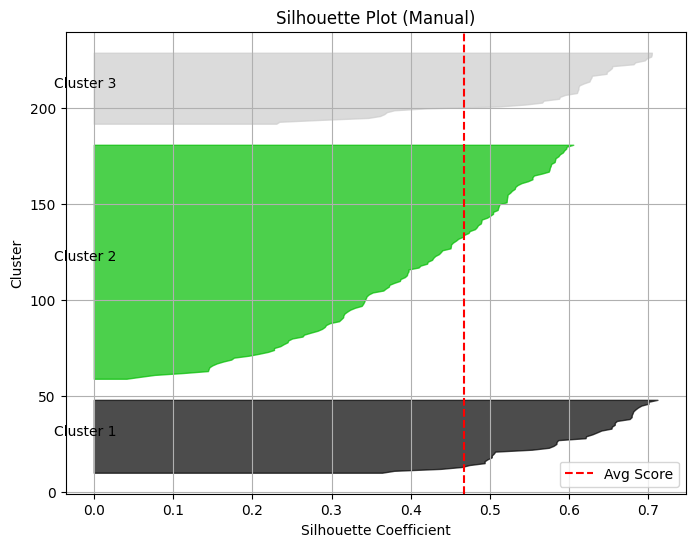

In [ ]:
# Ambil nilai per-titik
silhouette_vals = silhouette_samples_manual(X, labels)

# Urutkan berdasarkan cluster
y_lower = 10
unique_labels = np.unique(labels)
colors = cm.nipy_spectral(np.linspace(0, 1, len(unique_labels)))
plt.figure(figsize=(8, 6))

for i, label in enumerate(unique_labels):
    # Ambil nilai skor untuk cluster ini
    ith_cluster_silhouette = silhouette_vals[labels == label]
    ith_cluster_silhouette.sort()

    size_cluster = ith_cluster_silhouette.shape[0]
    y_upper = y_lower + size_cluster

    color = colors[i]
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster, f"Cluster {label + 1}")
    y_lower = y_upper + 10

plt.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--", label="Avg Score")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.title("Silhouette Plot (Manual)")
plt.legend()
plt.grid(True)
plt.show()


 Penjelasan Hasil:

Lebar tiap bar = jumlah data dalam cluster

Panjang bar = nilai silhouette score (semakin panjang, semakin bagus)

Garis merah = rata-rata skor keseluruhan

 Sumbu X = Nilai Silhouette Coefficient
Nilainya dari -1 sampai 1

Semakin ke kanan (mendekati 1), semakin baik posisi data dalam clusternya

Jika ada yang ke kiri (negatif) → artinya data itu mungkin salah tempat!

2. Sumbu Y = Data yang Diurutkan per Cluster
Setiap cluster memiliki blok horizontal sendiri

Masing-masing bar di blok itu = satu titik data

Semakin tebal blok = cluster semakin besar (banyak anggotanya)

3. Warna = Membedakan Cluster
Tiap warna menunjukkan satu cluster yang berbeda

4. Garis Merah Vertikal = Rata-rata Silhouette Score
Ini adalah skor keseluruhan dari seluruh data

Kalau sebagian besar bar melebihi garis ini → hasil clustering cukup bagus

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **2. KMeans dengan Elbow Method**

Median Income: 61.5, Median Spending: 50.0
Iterasi 1:
  Centroid 1: [60 52] -> [69.91946309 52.61744966]
  Centroid 2: [20 79] -> [25.72727273 79.36363636]
  Centroid 3: [30  4] -> [38.89655172 15.65517241]
Iterasi 2:
  Centroid 1: [69.91946309 52.61744966] -> [71.76086957 53.52173913]
  Centroid 2: [25.72727273 79.36363636] -> [28.07692308 76.23076923]
  Centroid 3: [38.89655172 15.65517241] -> [41.08333333 18.66666667]
Iterasi 3:
  Centroid 1: [71.76086957 53.52173913] -> [72.96923077 54.36153846]
  Centroid 2: [28.07692308 76.23076923] -> [29.10714286 74.57142857]
  Centroid 3: [41.08333333 18.66666667] -> [43.11904762 21.07142857]
Iterasi 4:
  Centroid 1: [72.96923077 54.36153846] -> [74.54545455 54.80991736]
  Centroid 2: [29.10714286 74.57142857] -> [32.17647059 71.35294118]
  Centroid 3: [43.11904762 21.07142857] -> [44.4        21.82222222]
Iterasi 5:
  Centroid 1: [74.54545455 54.80991736] -> [76.51818182 55.88181818]
  Centroid 2: [32.17647059 71.35294118] -> [34.55  68.525]


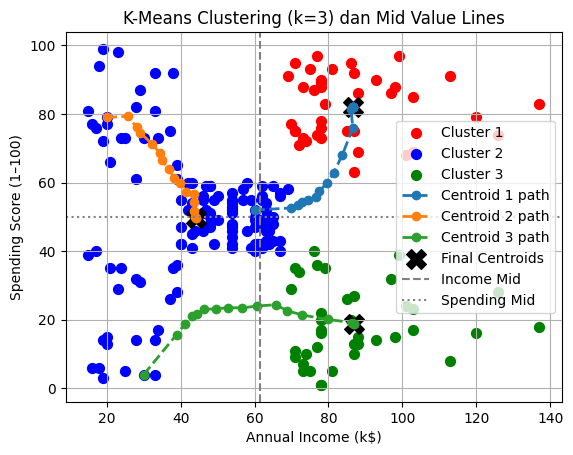

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# --- Load Data ---
data = data
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values


# --- K-Means Final ---
k = 3  # Ubah sesuai hasil elbow jika perlu
max_iters = 100
tol = 1e-4
np.random.seed(42)

# --- Hitung Mid Value ---
income_mid = np.median(X[:, 0])
spending_mid = np.median(X[:, 1])
print(f"Median Income: {income_mid}, Median Spending: {spending_mid}")

# --- Inisialisasi Centroid ---
random_indices = np.random.choice(len(X), size=k, replace=False)
centroids = X[random_indices]
centroid_history = [centroids.copy()]

# --- Fungsi Jarak ---
def compute_distance(a, b):
    return np.linalg.norm(a - b)

# --- K-Means Iteratif ---
for iteration in range(max_iters):
    clusters = [[] for _ in range(k)]

    for point in X:
        distances = [compute_distance(point, centroid) for centroid in centroids]
        cluster_idx = np.argmin(distances)
        clusters[cluster_idx].append(point)

    new_centroids = np.array([
        np.mean(cluster, axis=0) if cluster else centroids[i]
        for i, cluster in enumerate(clusters)
    ])

    centroid_history.append(new_centroids.copy())

    print(f"Iterasi {iteration+1}:")
    for i, (old, new) in enumerate(zip(centroids, new_centroids)):
        print(f"  Centroid {i+1}: {old} -> {new}")

    if np.all(np.abs(new_centroids - centroids) < tol):
        print(f"\nKonvergen di iterasi ke-{iteration+1}")
        break

    centroids = new_centroids

# --- Buat Label Hasil Cluster ---
labels = np.zeros(len(X), dtype=int)
for i, point in enumerate(X):
    distances = [compute_distance(point, centroid) for centroid in centroids]
    labels[i] = np.argmin(distances)

# --- Visualisasi Clustering ---
colors = ['red', 'blue', 'green', 'orange']
for idx, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], s=50, color=colors[idx], label=f'Cluster {idx+1}')

centroid_history = np.array(centroid_history)
for i in range(k):
    plt.plot(centroid_history[:, i, 0], centroid_history[:, i, 1], '--o', label=f'Centroid {i+1} path', linewidth=2)

plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='black', marker='X', label='Final Centroids')
plt.axvline(income_mid, color='gray', linestyle='--', label='Income Mid')
plt.axhline(spending_mid, color='gray', linestyle=':', label='Spending Mid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.title('K-Means Clustering (k=3) dan Mid Value Lines')
plt.legend()
plt.grid(True)
plt.show()


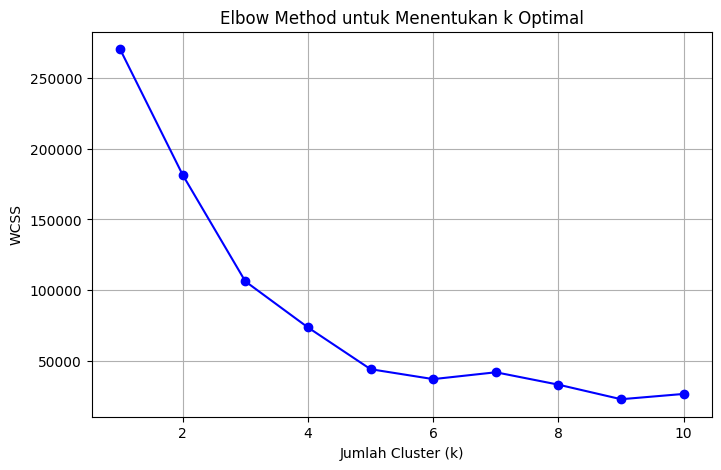

In [ ]:
# --- Elbow Method untuk Menentukan k Optimal ---
wcss = []  # Menyimpan Within-Cluster Sum of Squares
K_range = range(1, 11)

for k_val in K_range:
    random_indices = np.random.choice(len(X), size=k_val, replace=False)
    centroids = X[random_indices]

    for iteration in range(100):  # max iterasi
        clusters = [[] for _ in range(k_val)]
        for point in X:
            distances = [np.linalg.norm(point - centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)

        new_centroids = np.array([
            np.mean(cluster, axis=0) if cluster else centroids[i]
            for i, cluster in enumerate(clusters)
        ])

        if np.all(np.abs(new_centroids - centroids) < 1e-4):
            break
        centroids = new_centroids

    # Hitung total WCSS
    total_wcss = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            total_wcss += np.linalg.norm(point - centroids[i]) ** 2
    wcss.append(total_wcss)

# --- Plot Elbow Curve ---
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method untuk Menentukan k Optimal')
plt.grid(True)
plt.show()

**EVALUASI ELBOW METHOD**

sebelum nya telah digunakan evaluasi dari silhouette score yang mana didapatkan hasil 0,4676. hasil cukup bagus.

Dengan elbow method kita dapat melihat evaluasi **menggunakan WCSS (Within-Cluster Sum of Squares)** menggambarkan seberapa rapat data dalam 1 cluster nya

kenapa WCSS di grafik bisa 270.000 padahal cuma 200 data?
Karena:

*   
Data "Annual Income" dalam (k$) bisa bernilai hingga 137.
*   Kuadrat jarak dari tiap titik ke centroid bisa menghasilkan angka besar.
* Total dari semua jarak kuadrat itulah yang membentuk WCSS.


Dilihat dari titik "siku" melandai di jumlah cluster = 5. ini menandakan kluster = 5 bisa menjadi jumlah kluster paling optimal



**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **ESKPERIMEN**


Median Income: 61.5, Median Spending: 50.0
Iterasi 1:
  Centroid 1: [60 52] -> [65.10569106 59.5203252 ]
  Centroid 2: [20 79] -> [25.72727273 79.36363636]
  Centroid 3: [30  4] -> [25.14285714 19.52380952]
  Centroid 4: [78  1] -> [97.41176471 13.29411765]
  Centroid 5: [71 11] -> [79.64705882 19.82352941]
Iterasi 2:
  Centroid 1: [65.10569106 59.5203252 ] -> [66.13274336 61.2300885 ]
  Centroid 2: [25.72727273 79.36363636] -> [26.30434783 78.56521739]
  Centroid 3: [25.14285714 19.52380952] -> [28.         23.30769231]
  Centroid 4: [97.41176471 13.29411765] -> [103.78571429  19.42857143]
  Centroid 5: [79.64705882 19.82352941] -> [77.20833333 18.16666667]
Iterasi 3:
  Centroid 1: [66.13274336 61.2300885 ] -> [65.3853211  61.19266055]
  Centroid 2: [26.30434783 78.56521739] -> [26.30434783 78.56521739]
  Centroid 3: [28.         23.30769231] -> [28.96428571 24.92857143]
  Centroid 4: [103.78571429  19.42857143] -> [111.76923077  30.07692308]
  Centroid 5: [77.20833333 18.16666667] ->

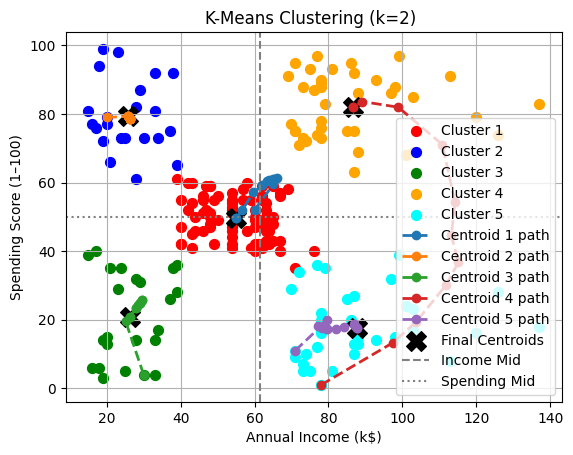


Silhouette Score Total K = 2: 0.553


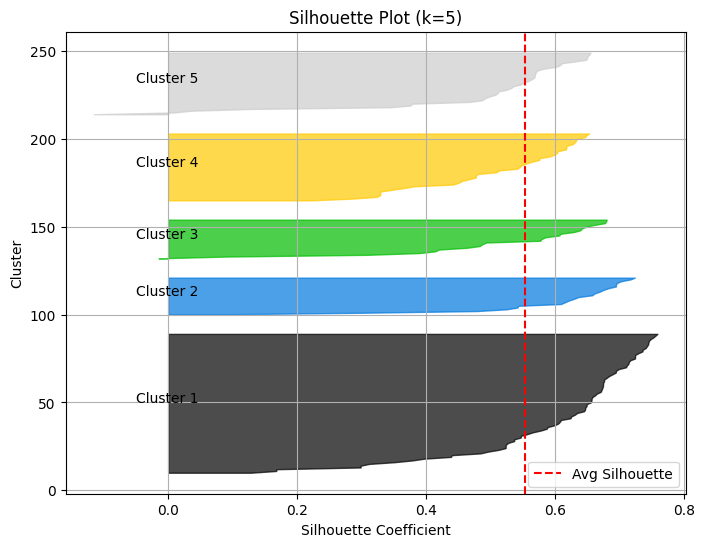

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# --- Load Data ---
data = data
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# --- Parameter ---
k = 5
max_iters = 100
tol = 1e-4
np.random.seed(42)

# --- Hitung Mid Value ---
income_mid = np.median(X[:, 0])
spending_mid = np.median(X[:, 1])
print(f"Median Income: {income_mid}, Median Spending: {spending_mid}")

# --- Inisialisasi Centroid ---
random_indices = np.random.choice(len(X), size=k, replace=False)
centroids = X[random_indices]
centroid_history = [centroids.copy()]

# --- Fungsi Jarak ---
def compute_distance(a, b):
    return np.linalg.norm(a - b)

# --- K-Means Iteratif ---
for iteration in range(max_iters):
    clusters = [[] for _ in range(k)]

    for point in X:
        distances = [compute_distance(point, centroid) for centroid in centroids]
        cluster_idx = np.argmin(distances)
        clusters[cluster_idx].append(point)

    new_centroids = np.array([
        np.mean(cluster, axis=0) if cluster else centroids[i]
        for i, cluster in enumerate(clusters)
    ])

    centroid_history.append(new_centroids.copy())

    print(f"Iterasi {iteration+1}:")
    for i, (old, new) in enumerate(zip(centroids, new_centroids)):
        print(f"  Centroid {i+1}: {old} -> {new}")

    if np.all(np.abs(new_centroids - centroids) < tol):
        print(f"\nKonvergen di iterasi ke-{iteration+1}")
        break

    centroids = new_centroids

# --- Buat label hasil cluster ---
labels = np.zeros(len(X), dtype=int)
for i, point in enumerate(X):
    distances = [compute_distance(point, centroid) for centroid in centroids]
    labels[i] = np.argmin(distances)

# --- Visualisasi Clustering ---
colors = ['red', 'blue', 'green', 'orange','cyan']
for idx, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], s=50, color=colors[idx], label=f'Cluster {idx+1}')

centroid_history = np.array(centroid_history)
for i in range(k):
    plt.plot(centroid_history[:, i, 0], centroid_history[:, i, 1], '--o', label=f'Centroid {i+1} path', linewidth=2)

plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='black', marker='X', label='Final Centroids')
plt.axvline(income_mid, color='gray', linestyle='--', label='Income Mid')
plt.axhline(spending_mid, color='gray', linestyle=':', label='Spending Mid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.title('K-Means Clustering (k=2) ')
plt.legend()
plt.grid(True)
plt.show()

# --- Hitung Silhouette Score per Titik ---
def silhouette_samples_manual(X, labels):
    n = len(X)
    unique_labels = np.unique(labels)
    silhouette_vals = np.zeros(n)
    clusters_indices = {label: np.where(labels == label)[0] for label in unique_labels}

    for idx in range(n):
        label = labels[idx]
        own_cluster = clusters_indices[label]

        a = np.mean([
            compute_distance(X[idx], X[j])
            for j in own_cluster if j != idx
        ]) if len(own_cluster) > 1 else 0

        b = np.inf
        for other_label in unique_labels:
            if other_label == label:
                continue
            other_cluster = clusters_indices[other_label]
            dist = np.mean([compute_distance(X[idx], X[j]) for j in other_cluster])
            b = min(b, dist)

        silhouette_vals[idx] = (b - a) / max(a, b) if max(a, b) > 0 else 0

    return silhouette_vals

silhouette_vals = silhouette_samples_manual(X, labels)
overall_score = np.mean(silhouette_vals)
print(f"\nSilhouette Score Total K = 2: {overall_score:.3f}")

# --- Plot Silhouette Diagram ---
y_lower = 10
unique_labels = np.unique(labels)
colors = cm.nipy_spectral(np.linspace(0, 1, len(unique_labels)))
plt.figure(figsize=(8, 6))

for i, label in enumerate(unique_labels):
    ith_cluster_silhouette = silhouette_vals[labels == label]
    ith_cluster_silhouette.sort()

    size_cluster = ith_cluster_silhouette.shape[0]
    y_upper = y_lower + size_cluster

    color = colors[i]
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster, f"Cluster {label + 1}")
    y_lower = y_upper + 10

plt.axvline(x=overall_score, color="red", linestyle="--", label="Avg Silhouette")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.title("Silhouette Plot (k=5)")
plt.legend()
plt.grid(True)
plt.show()


**DESKRIPSI**

Dengan adanya eksperimen pada bagian penambahan cluster menjadi 5, dengan representasi kluster sebagai berikut:

1. clusuter 1 menunjukan mid income-mid spending.

2. cluster 2 menunjukan low income-high spending

3. cluster 3 menunjukan low income-low spending

4. cluster 4 menunjukan high income high spending

5. cluster 5 menunjukan high income-low spending


S-score m= 0,553 menandakan hasil > 0 yang artinya cukup baik


Terdapat 2 kluster baru yang ditambahkan  dan lebih menunjukan klusterisasi spesifik.
dapat disimpulkan eksperimen penambahan jumlah cluster dapat lebih baik menunjukan data menjadi semakin jelas.

**--------------------------------------------------------------------------------------------------------------------------------------------------------------**

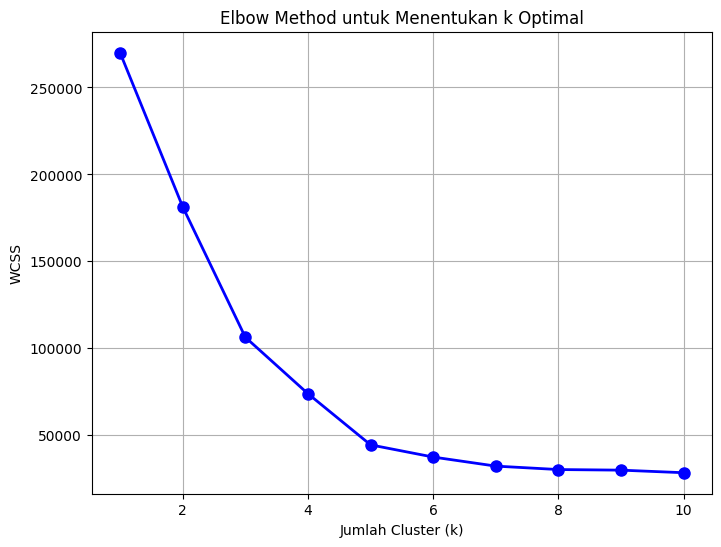

Median Income: 61.5, Median Spending: 50.0
Iterasi 1:
  Centroid 1: [60 52] -> [65.10569106 59.5203252 ]
  Centroid 2: [20 79] -> [25.72727273 79.36363636]
  Centroid 3: [30  4] -> [25.14285714 19.52380952]
  Centroid 4: [78  1] -> [97.41176471 13.29411765]
  Centroid 5: [71 11] -> [79.64705882 19.82352941]
Iterasi 2:
  Centroid 1: [65.10569106 59.5203252 ] -> [66.13274336 61.2300885 ]
  Centroid 2: [25.72727273 79.36363636] -> [26.30434783 78.56521739]
  Centroid 3: [25.14285714 19.52380952] -> [28.         23.30769231]
  Centroid 4: [97.41176471 13.29411765] -> [103.78571429  19.42857143]
  Centroid 5: [79.64705882 19.82352941] -> [77.20833333 18.16666667]
Iterasi 3:
  Centroid 1: [66.13274336 61.2300885 ] -> [65.3853211  61.19266055]
  Centroid 2: [26.30434783 78.56521739] -> [26.30434783 78.56521739]
  Centroid 3: [28.         23.30769231] -> [28.96428571 24.92857143]
  Centroid 4: [103.78571429  19.42857143] -> [111.76923077  30.07692308]
  Centroid 5: [77.20833333 18.16666667] ->

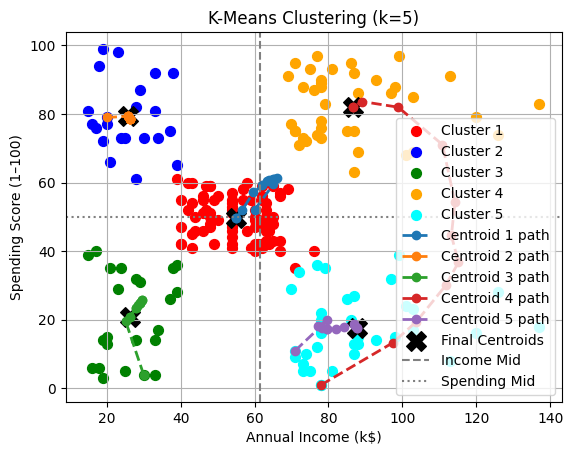

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Load Data ---
data = data
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# --- Elbow Method ---
wcss = []
K_range = range(1, 11)

for k_val in K_range:
    np.random.seed(42)
    random_indices = np.random.choice(len(X), size=k_val, replace=False)
    centroids = X[random_indices]

    for _ in range(100):
        clusters = [[] for _ in range(k_val)]
        for point in X:
            distances = [np.linalg.norm(point - c) for c in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)
        new_centroids = np.array([
            np.mean(cluster, axis=0) if cluster else centroids[i]
            for i, cluster in enumerate(clusters)
        ])
        if np.all(np.abs(new_centroids - centroids) < 1e-4):
            break
        centroids = new_centroids

    total_wcss = 0
    for i in range(k_val):
        total_wcss += np.sum((clusters[i] - centroids[i])**2)
    wcss.append(total_wcss)

# --- Plot Elbow Method ---
plt.figure(figsize=(8, 6))
plt.plot(K_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method untuk Menentukan k Optimal')
plt.grid(True)
plt.show()

# --- Parameter untuk K-Means Akhir ---
k = 5
max_iters = 100
tol = 1e-4
np.random.seed(42)

# --- Hitung Mid Value ---
income_mid = np.median(X[:, 0])
spending_mid = np.median(X[:, 1])
print(f"Median Income: {income_mid}, Median Spending: {spending_mid}")

# --- Inisialisasi Centroid ---
random_indices = np.random.choice(len(X), size=k, replace=False)
centroids = X[random_indices]
centroid_history = [centroids.copy()]

# --- Fungsi Jarak ---
def compute_distance(a, b):
    return np.linalg.norm(a - b)

# --- K-Means Iteratif ---
for iteration in range(max_iters):
    clusters = [[] for _ in range(k)]

    for point in X:
        distances = [compute_distance(point, centroid) for centroid in centroids]
        cluster_idx = np.argmin(distances)
        clusters[cluster_idx].append(point)

    new_centroids = np.array([
        np.mean(cluster, axis=0) if cluster else centroids[i]
        for i, cluster in enumerate(clusters)
    ])

    centroid_history.append(new_centroids.copy())

    print(f"Iterasi {iteration+1}:")
    for i, (old, new) in enumerate(zip(centroids, new_centroids)):
        print(f"  Centroid {i+1}: {old} -> {new}")

    if np.all(np.abs(new_centroids - centroids) < tol):
        print(f"\nKonvergen di iterasi ke-{iteration+1}")
        break

    centroids = new_centroids

# --- Buat label hasil cluster ---
labels = np.zeros(len(X), dtype=int)
for i, point in enumerate(X):
    distances = [compute_distance(point, centroid) for centroid in centroids]
    labels[i] = np.argmin(distances)

# --- Visualisasi Clustering ---
colors = ['red', 'blue', 'green', 'orange', 'cyan']
for idx, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], s=50, color=colors[idx], label=f'Cluster {idx+1}')

centroid_history = np.array(centroid_history)
for i in range(k):
    plt.plot(centroid_history[:, i, 0], centroid_history[:, i, 1], '--o', label=f'Centroid {i+1} path', linewidth=2)

plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='black', marker='X', label='Final Centroids')
plt.axvline(income_mid, color='gray', linestyle='--', label='Income Mid')
plt.axhline(spending_mid, color='gray', linestyle=':', label='Spending Mid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.title('K-Means Clustering (k=5)')
plt.legend()
plt.grid(True)
plt.show()


**DESKRIPSI**

**ELBOW METHOD**
diatas digunakan untuk meng evaluasi data dengan jumlah kluster yang telah ditambahkan menjadi 5. dan hal tersebut menunjukan bahwa titik 'siku' melandai dan tidak berubah secara siginifikan pada kluster 5. Hal ini menunjukan bahwa jumlah kluster sebanyak 5 adalah jumlah kluster yang optimal untuk data yang ada.